In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving corona_tested_individuals_ver_0083.english.csv to corona_tested_individuals_ver_0083.english.csv


In [ ]:
df = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')

In [ ]:
df.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,11/12/2020,0,0,0,0,0,negative,No,male,Other
1,11/12/2020,0,1,0,0,0,negative,No,male,Other
2,11/12/2020,0,0,0,0,0,negative,Yes,female,Other
3,11/12/2020,0,0,0,0,0,negative,No,male,Other
4,11/12/2020,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
df.dropna(subset = ['age_60_and_above','gender'] , inplace = True )

In [ ]:
X = df[['test_date', 'cough', 'fever', 'sore_throat','shortness_of_breath','age_60_and_above','gender','test_indication']].values
X[0:25]
X1 = df[['test_date', 'cough', 'fever', 'sore_throat','shortness_of_breath','age_60_and_above','gender','test_indication']]

In [ ]:
y = df['corona_result'].values
y[0:25]

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

In [ ]:
X1.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

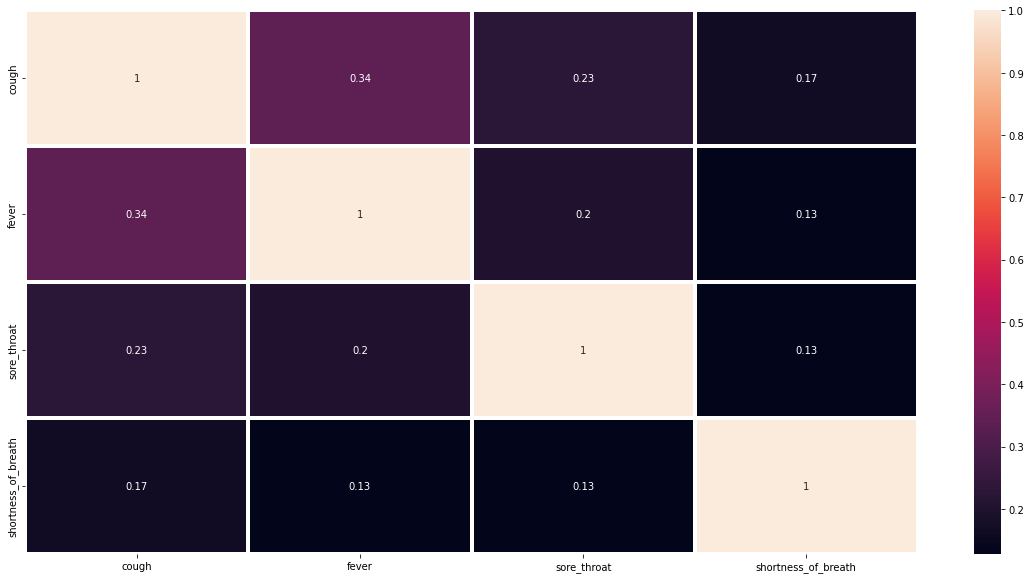

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(data = X1.corr(),annot = True, linewidths=3 )
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, train_size=0.8, test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(796256, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_X_train = X_train.copy()

label_X_valid = X_valid.copy()
object_cols = ['age_60_and_above','gender','test_indication']

# Applying label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:

    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

In [ ]:
label_X_train.drop('test_date' ,axis = 'columns' , inplace = True )
label_X_valid.drop('test_date' ,axis = 'columns' , inplace = True )
logistic = LogisticRegression(C = 0.01, solver = 'liblinear')
covid1 = logistic.fit(label_X_train, y_train)
yhat = covid1.predict(label_X_valid)
print(yhat)

['negative' 'negative' 'positive' ... 'negative' 'negative' 'negative']


In [ ]:
acc_logistic_regression = accuracy_score(y_valid, yhat)
print(acc_logistic_regression)

0.8934016527264964


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_X_train = X_train.copy()

label_X_valid = X_valid.copy()
object_cols = ['age_60_and_above','gender','test_indication']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:

    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

In [ ]:
label_X_train.drop('test_date' ,axis = 'columns' , inplace = True )
label_X_valid.drop('test_date' ,axis = 'columns' , inplace = True )
covid_tree = DecisionTreeClassifier(criterion = 'gini')
covid1 = covid_tree.fit(label_X_train, y_train)
yhat = covid1.predict(label_X_valid)

In [ ]:
acc_decision_tree = accuracy_score(y_valid, yhat)
print(acc_decision_tree)

0.8986712882726747


In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
%matplotlib inline 

In [ ]:
dot_data = StringIO()
filename = "covidtree.png"
featureNames = label_X_train.columns
targetNames = df["corona_result"].unique().tolist()
out=tree.export_graphviz(covid_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(df['corona_result']), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier().fit(label_X_valid, y_valid)
yhat = random.predict(label_X_valid)
print(yhat)

['negative' 'negative' 'positive' ... 'negative' 'negative' 'negative']


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, yhat))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.92      0.97      0.95    175155
       other       0.00      0.00      0.00      3399
    positive       0.60      0.47      0.53     20511

    accuracy                           0.90    199065
   macro avg       0.51      0.48      0.49    199065
weighted avg       0.88      0.90      0.89    199065



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc_random_forest = accuracy_score(y_valid, yhat)
print(acc_random_forest)

0.8987767814532942


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, yhat)

array([[169287,      0,   5868],
       [  2888,      0,    511],
       [ 10883,      0,   9628]])

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Score': [acc_logistic_regression, acc_decision_tree, acc_random_forest]})

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.898777
1,Decision Tree,0.898671
0,Logistic Regression,0.893402
